# Beijing Multi-Site Air-Quality Prediction


In this Project, we are performing predictive analysis for air quality using data from Beijing 
Municipal Environmental Monitoring Center which captures air quality data from 12 nationally 
controlled air quality monitoring sites.

# Get Present working Directory

In [48]:
import os
cwd=os.getcwd()
cwd

'C:\\Users\\sanay\\OneDrive\\ALY6140\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228'

# Import File

In [49]:
import requests
import zipfile
import io

# URL of the ZIP file to download
zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip"

# Send HTTP request to download the ZIP file
response = requests.get(zip_url)

# Open the downloaded ZIP file using the io module
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extract the contents of the ZIP file to a specified directory
zip_file.extractall()

# Import the dataset 

In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import data 
data_url = 'PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
df = pd.read_csv(data_url, header=0)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [51]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


In [52]:
print(f'The number of rows in dataset is {df.shape[0]} and Number of columns in dataset is {df.shape[1]}')

The number of rows in dataset is 35064 and Number of columns in dataset is 18


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


# Descriptive statistics of columns 

In [54]:
df[["PM2.5","PM10","SO2",'NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


# Finding the null values in dataset

In [89]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

# Filter NA values 

In [90]:
df=df.dropna()

In [91]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [58]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [59]:
df['month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [60]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 24],
      dtype=int64)

In [61]:
df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [62]:
df['Date']=df['year'].astype(str).str.cat((df['month']).astype(str),sep='-').str.cat((df['day']).astype(str),sep='-')
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S.%f')

In [63]:
df['Date'].head()

0   2013-03-01
1   2013-03-01
2   2013-03-01
3   2013-03-01
4   2013-03-01
Name: Date, dtype: datetime64[ns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31815 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       31815 non-null  int64         
 1   year     31815 non-null  int64         
 2   month    31815 non-null  int64         
 3   day      31815 non-null  int64         
 4   hour     31815 non-null  int64         
 5   PM2.5    31815 non-null  float64       
 6   PM10     31815 non-null  float64       
 7   SO2      31815 non-null  float64       
 8   NO2      31815 non-null  float64       
 9   CO       31815 non-null  float64       
 10  O3       31815 non-null  float64       
 11  TEMP     31815 non-null  float64       
 12  PRES     31815 non-null  float64       
 13  DEWP     31815 non-null  float64       
 14  RAIN     31815 non-null  float64       
 15  wd       31815 non-null  object        
 16  WSPM     31815 non-null  float64       
 17  station  31815 non-null  object

# Import python functions

In [65]:
%run my_script.py

The max level of PM2.5 in year 2017 is 1    713.0
Name: PM2.5, dtype: float64
The average level of PM2.5 in year 2016 and month 2 is 35    44.758671
Name: PM2.5, dtype: float64
The %chane in average PMlevel2.5 for 2014 and 1 per day is 
     Percentage Change       PM2.5  day
306         -12.920090   48.583333    1
307         212.264151  151.708333    2
308         -66.712442   50.500000    3
309         140.594059  121.500000    4
310         -25.823045   90.125000    5
311          38.927416  125.208333    6
312         -16.106489  105.041667    7
313         -85.521618   15.208333    8
314         136.712329   36.000000    9
315          68.287037   60.583333   10
316          80.674003  109.458333   11
317         -80.966882   20.833333   12
318         280.400000   79.250000   13
319          10.883281   87.875000   14
320          74.158369  153.041667   15
321         133.923224  358.000000   16
322         -65.363128  124.000000   17
323         -51.310484   60.375000   18
324

In [66]:
data_1=df.groupby(['year','month','day','hour'])

# Plotting the line charts 

In [67]:
subset1=df.groupby(['year','month'])[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']].max()
subset1.reset_index(inplace=True)
subset1['Year/month']=subset1['year'].astype(str).str.cat((subset1['month']).astype(str),sep='/')
subset1['year']=subset1['year'].astype(str)

In [68]:
subset1.head()

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Year/month
0,2013,3,463.0,844.0,182.0,226.0,5700.0,107.0000,22.5,1031.3,4.9,2.5,8.3,2013/3
1,2013,4,263.0,358.0,132.0,140.0,3299.0,144.0000,29.1,1021.6,9.3,1.9,7.6,2013/4
2,2013,5,665.0,655.0,175.0,173.0,3299.0,248.0000,33.7,1013.9,18.4,1.2,7.4,2013/5
3,2013,6,510.0,564.0,107.0,228.0,3399.0,302.8788,35.4,1009.0,24.1,16.0,4.7,2013/6
4,2013,7,271.0,396.0,82.0,133.0,2800.0,291.0000,37.9,1004.1,26.4,21.0,4.9,2013/7


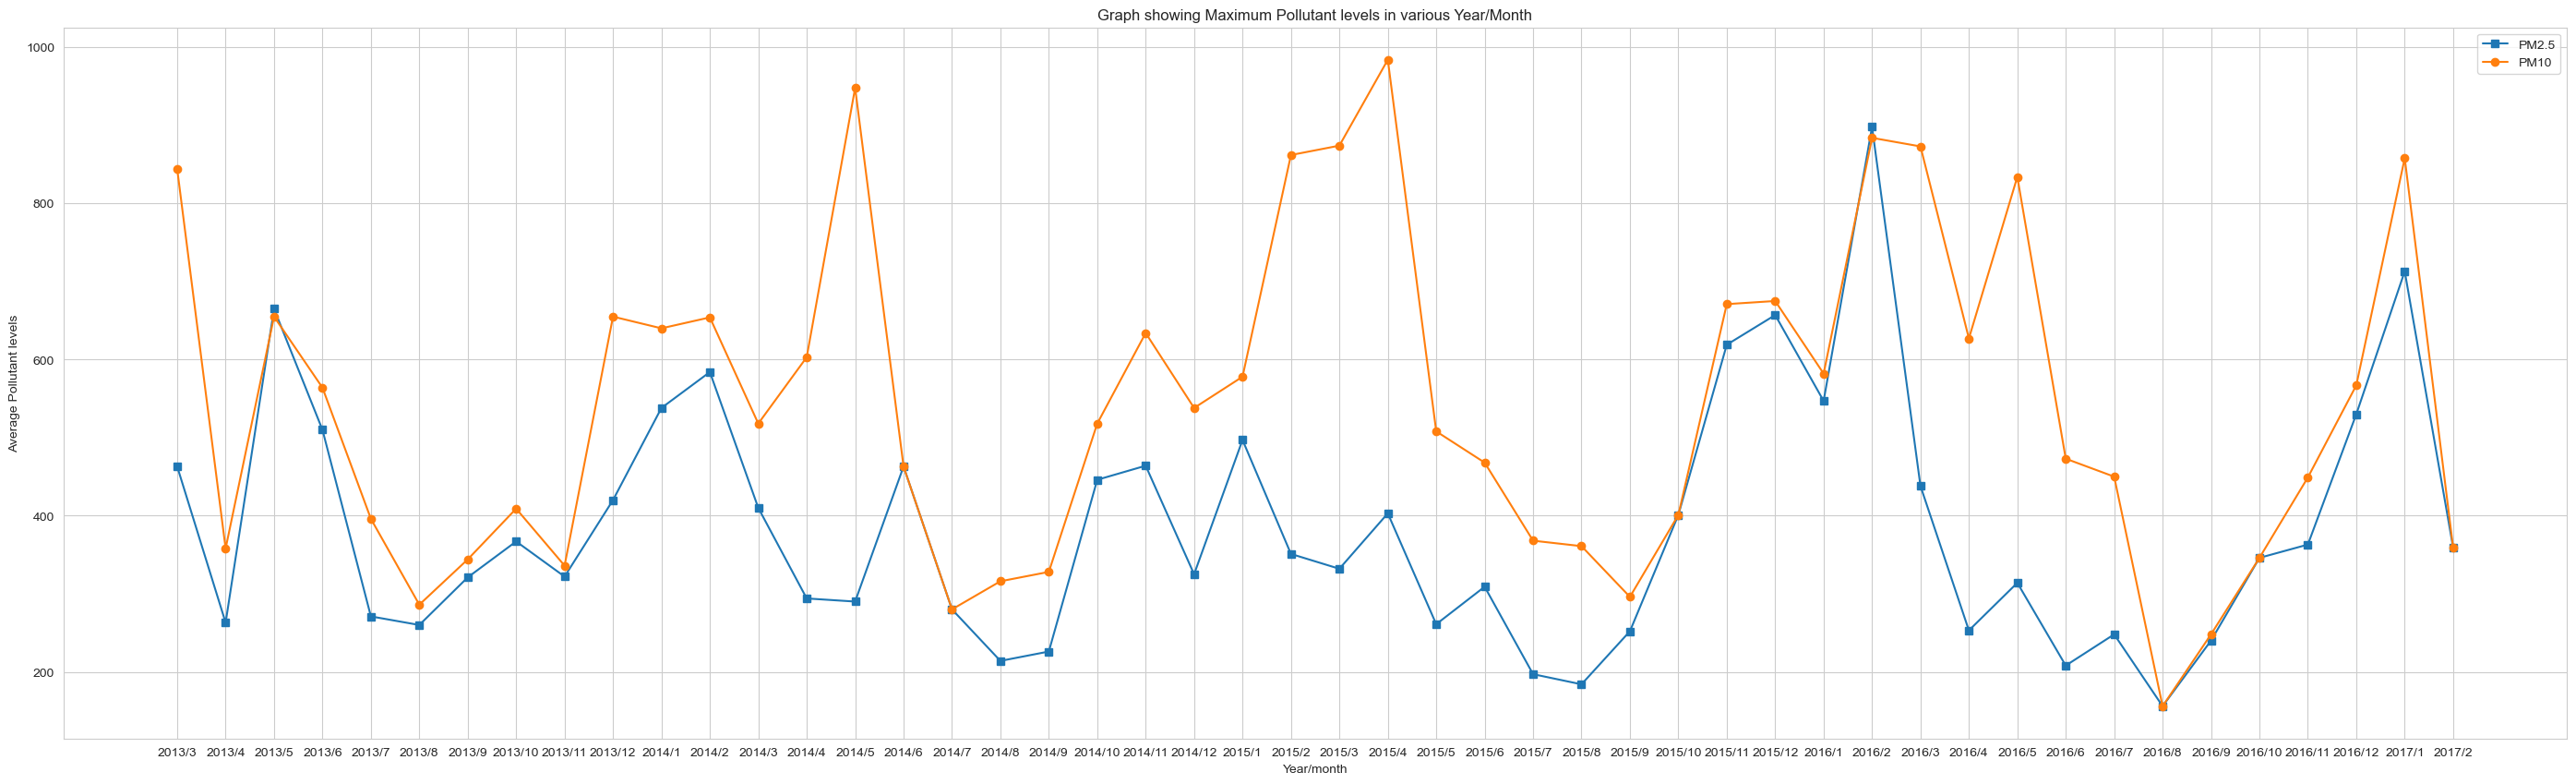

In [69]:
sns.set_style("whitegrid")
plt.figure(figsize=(35,10))
plt.plot(subset1['Year/month'],subset1['PM2.5'],marker="s");
plt.plot(subset1['Year/month'],subset1['PM10'],marker="o");
plt.xlabel('Year/month')
plt.ylabel("Average Pollutant levels")
plt.title("Graph showing Maximum Pollutant levels in various Year/Month")
plt.legend(["PM2.5","PM10"])

In [70]:
subset3=df.groupby(['month'])[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']].mean()
subset3.reset_index(inplace=True)
subset3['month']=subset3['month'].astype(str)
subset3.head()

,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,92.817045,113.911510,34.923976,66.113073,1959.568641,27.034153,-1.636747,1023.247352,-14.333536,0.000337,1.878571
1,2,85.840645,104.105993,31.240030,53.620950,1442.212190,43.634351,1.299797,1021.382380,-12.689856,0.010845,1.974142
2,3,99.999384,150.369090,31.748904,63.432501,1375.413529,47.584506,8.403951,1014.972116,-7.177352,0.009073,2.028125
3,4,76.177490,131.090021,16.405318,52.834632,850.421206,65.563523,15.309271,1009.360347,1.170903,0.023542,2.173958
4,5,67.340081,115.583283,16.058802,48.855499,785.214286,89.576910,21.419657,1003.427655,7.710517,0.047413,2.043548


Text(0.5, 1.0, 'Average O3 levels in various Month')

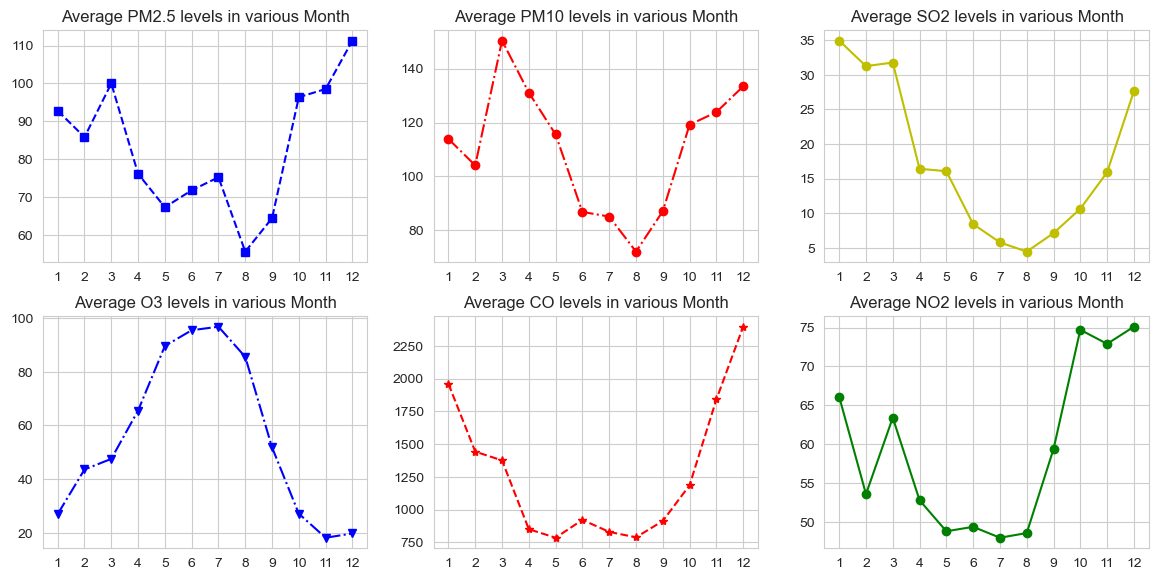

In [71]:
sns.set_style("whitegrid")
fig, axes=plt.subplots(2,3,figsize=(12,6))
plt.tight_layout(pad=2)
axes[0,0].plot(subset3['month'],subset3['PM2.5'],'s--b')
axes[0,0].set_title("Average PM2.5 levels in various Month")
axes[0,1].plot(subset3['month'],subset3['PM10'],'o-.r')
axes[0,1].set_title("Average PM10 levels in various Month")
axes[0,2].plot(subset3['month'],subset3['SO2'],'o-y')
axes[0,2].set_title("Average SO2 levels in various Month")
axes[1,2].plot(subset3['month'],subset3['NO2'],'o-g')
axes[1,2].set_title("Average NO2 levels in various Month")
axes[1,1].plot(subset3['month'],subset3['CO'],'*--r')
axes[1,1].set_title("Average CO levels in various Month")
axes[1,0].plot(subset3['month'],subset3['O3'],'v-.b')
axes[1,0].set_title("Average O3 levels in various Month")

# Plotting Barplots

In [72]:
subset2=df.groupby(['year'])[['PM2.5','PM10','SO2','NO2','CO']].mean()
subset2.reset_index(inplace=True)
subset2['year']=subset2['year'].astype(str)

Text(0.5, 1.0, 'Line chart showing Average PM 2.5 levels in Years')

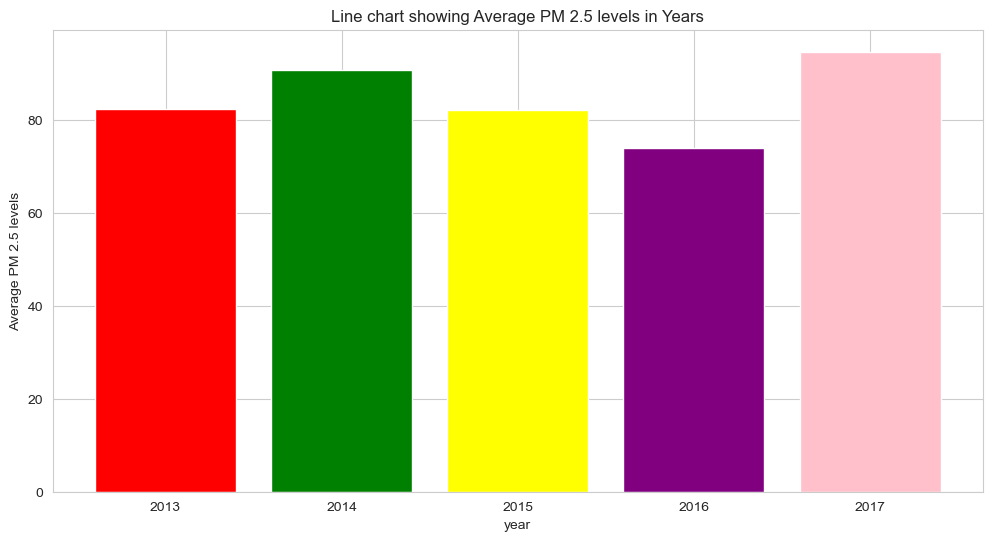

In [73]:
plt.figure(figsize=(12,6))
colors=["red",'green','yellow','purple','pink']
plt.bar(subset2['year'],subset2['PM2.5'],color=colors);
plt.xlabel('year')
plt.ylabel("Average PM 2.5 levels")
plt.title("Line chart showing Average PM 2.5 levels in Years")

Text(0.5, 1.0, 'Line chart showing Average PM10 levels in Years')

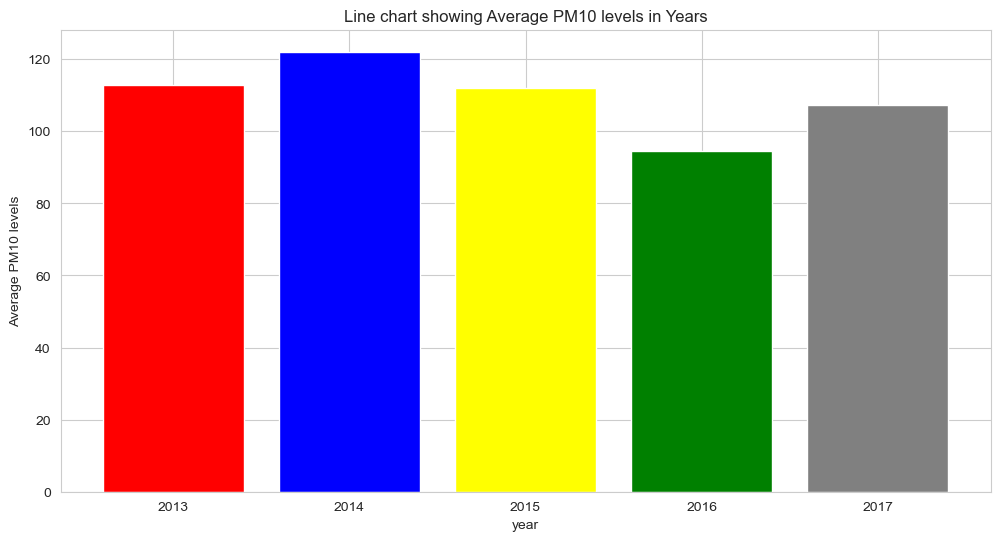

In [74]:
plt.figure(figsize=(12,6))
colors=["red",'blue','yellow','green','gray']
plt.bar(subset2['year'],subset2['PM10'],color=colors);
plt.xlabel('year')
plt.ylabel("Average PM10 levels")
plt.title("Line chart showing Average PM10 levels in Years")

# Plotting Scatterplots

<Axes: xlabel='PM2.5', ylabel='PM10'>

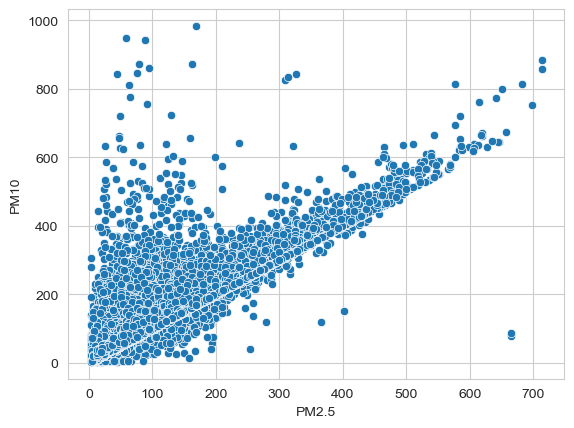

In [75]:
sns.scatterplot(x=df['PM2.5'],y=df['PM10'])

<Axes: xlabel='SO2', ylabel='PM2.5'>

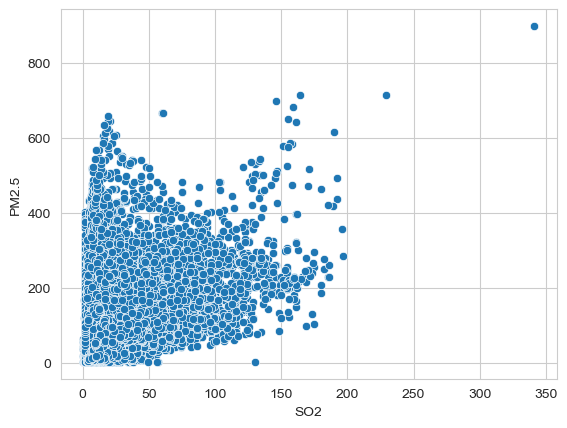

In [76]:
sns.scatterplot(y=df['PM2.5'],x=df['SO2'])

<Axes: xlabel='NO2', ylabel='PM2.5'>

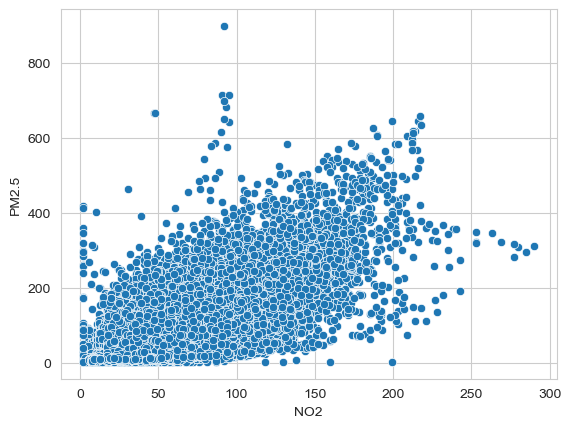

In [77]:
sns.scatterplot(y=df['PM2.5'],x=df['NO2'])

<Axes: xlabel='CO', ylabel='PM2.5'>

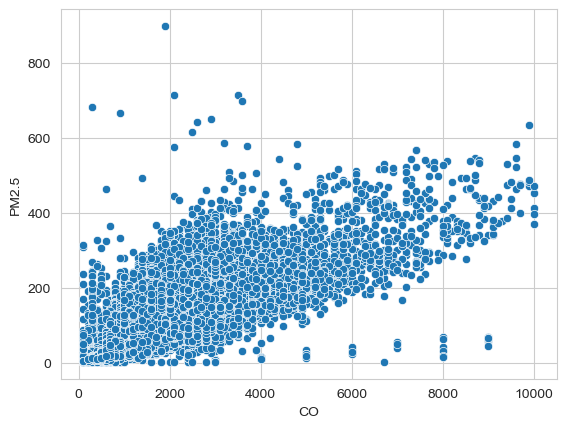

In [78]:
sns.scatterplot(y=df['PM2.5'],x=df['CO'])

<Axes: xlabel='PM2.5', ylabel='O3'>

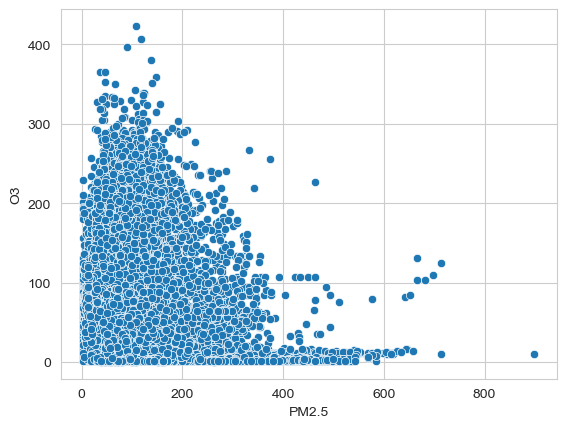

In [79]:
sns.scatterplot(x=df['PM2.5'],y=df['O3'])

<Axes: xlabel='PM2.5', ylabel='TEMP'>

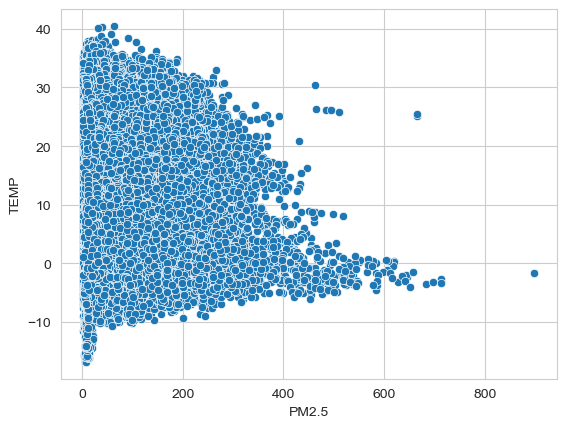

In [80]:
sns.scatterplot(x=df['PM2.5'],y=df['TEMP'])

<Axes: xlabel='PRES', ylabel='PM2.5'>

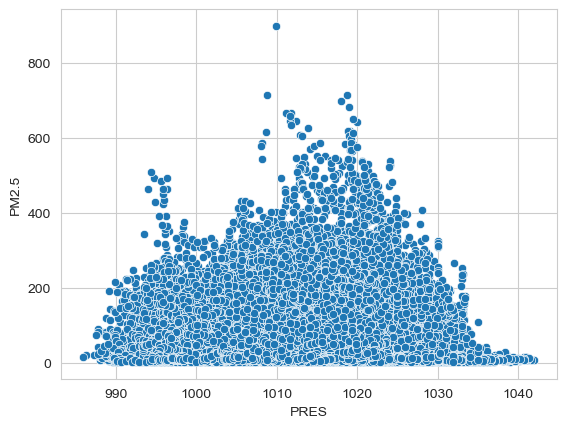

In [81]:
sns.scatterplot(y=df['PM2.5'],x=df['PRES'])

<Axes: xlabel='PM2.5', ylabel='RAIN'>

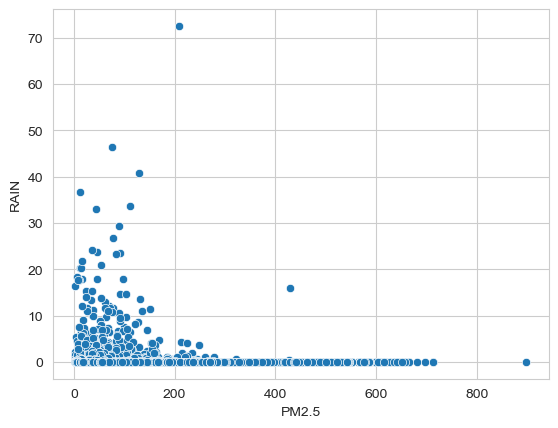

In [82]:
sns.scatterplot(x=df['PM2.5'],y=df['RAIN'])

<Axes: xlabel='WSPM', ylabel='PM2.5'>

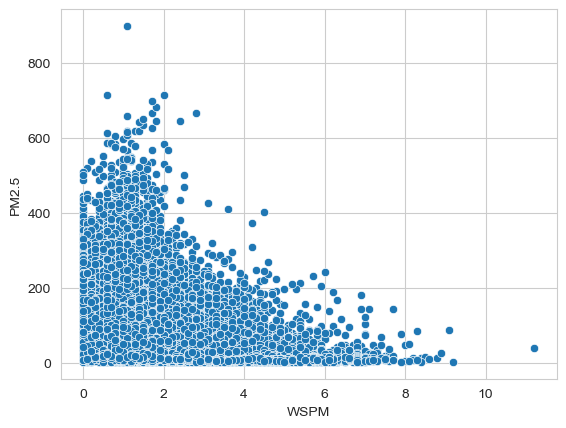

In [83]:
sns.scatterplot(y=df['PM2.5'],x=df['WSPM'])

# Histograms

Text(0.5, 1.0, 'Histogram of RAIN levels')

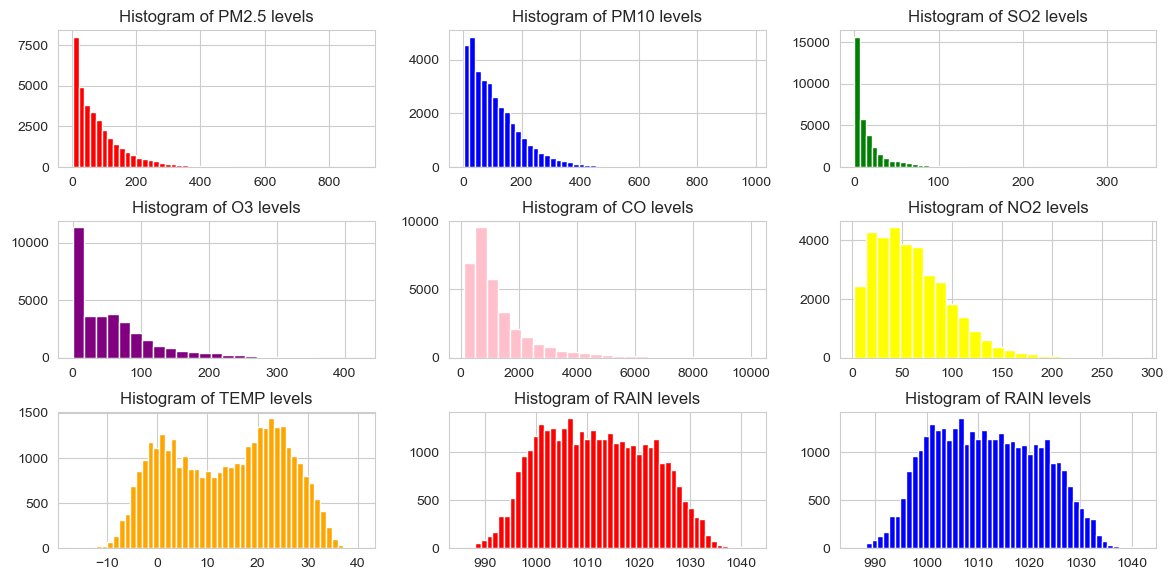

In [84]:
sns.set_style("whitegrid")
fig, axes=plt.subplots(3,3,figsize=(12,6))
plt.tight_layout(pad=2)
axes[0,0].hist(df['PM2.5'],bins=50,color="red")
axes[0,0].set_title("Histogram of PM2.5 levels")
axes[0,1].hist(df['PM10'],bins=50,color="blue")
axes[0,1].set_title("Histogram of PM10 levels")
axes[0,2].hist(df['SO2'],bins=50,color="green")
axes[0,2].set_title("Histogram of SO2 levels")
axes[1,2].hist(df['NO2'],bins=25,color="yellow")
axes[1,2].set_title("Histogram of NO2 levels")
axes[1,1].hist(df['CO'],bins=25,color="pink")
axes[1,1].set_title("Histogram of CO levels")
axes[1,0].hist(df['O3'],bins=25,color="purple")
axes[1,0].set_title("Histogram of O3 levels")
axes[2,0].hist(df['TEMP'],bins=50,color="orange")
axes[2,0].set_title("Histogram of TEMP levels")
axes[2,1].hist(df['PRES'],bins=50,color="red")
axes[2,1].set_title("Histogram of RAIN levels")
axes[2,2].hist(df['PRES'],bins=50,color="blue")
axes[2,2].set_title("Histogram of RAIN levels")

# correlation matrix 

In [85]:
corr_df=df[["PM2.5","PM10","SO2",'NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM','year','month','day','hour']]
correlation_matrix = round(corr_df.corr(),2)
print(correlation_matrix)

       PM2.5  PM10   SO2   NO2    CO    O3  TEMP  PRES  DEWP  RAIN  WSPM  \
PM2.5   1.00  0.88  0.48  0.68  0.79 -0.16 -0.13 -0.01  0.12 -0.01 -0.28   
PM10    0.88  1.00  0.47  0.65  0.68 -0.14 -0.11 -0.04  0.06 -0.03 -0.18   
SO2     0.48  0.47  1.00  0.43  0.54 -0.20 -0.35  0.20 -0.28 -0.04 -0.11   
NO2     0.68  0.65  0.43  1.00  0.69 -0.50 -0.24  0.08  0.07 -0.04 -0.49   
CO      0.79  0.68  0.54  0.69  1.00 -0.33 -0.37  0.22 -0.10 -0.02 -0.28   
O3     -0.16 -0.14 -0.20 -0.50 -0.33  1.00  0.59 -0.42  0.29  0.03  0.34   
TEMP   -0.13 -0.11 -0.35 -0.24 -0.37  0.59  1.00 -0.83  0.82  0.04  0.04   
PRES   -0.01 -0.04  0.20  0.08  0.22 -0.42 -0.83  1.00 -0.78 -0.06  0.07   
DEWP    0.12  0.06 -0.28  0.07 -0.10  0.29  0.82 -0.78  1.00  0.08 -0.31   
RAIN   -0.01 -0.03 -0.04 -0.04 -0.02  0.03  0.04 -0.06  0.08  1.00  0.02   
WSPM   -0.28 -0.18 -0.11 -0.49 -0.28  0.34  0.04  0.07 -0.31  0.02  1.00   
year   -0.03 -0.07 -0.18 -0.12  0.05  0.07 -0.14  0.23 -0.20 -0.00  0.13   
month   0.03

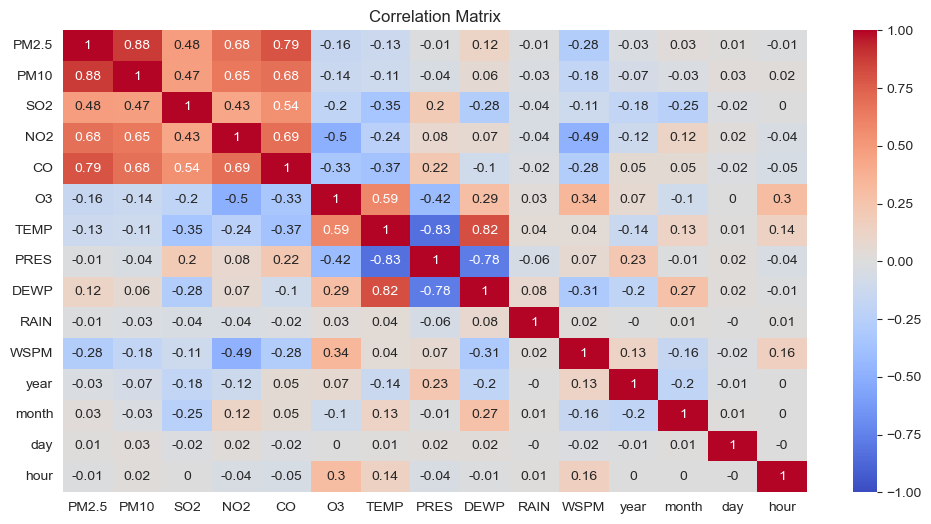

In [86]:
# plot the correlation matrix as a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Divide Data into test and train 

In [94]:
from sklearn.model_selection import train_test_split
import numpy as np

# create some sample data
x = df[["PM10","SO2",'NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM','year','month','day','hour']]
y = df[["PM2.5"]]

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# print the shapes of the training and testing sets
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (22270, 14)
y_train shape: (22270, 1)
x_test shape: (9545, 14)
y_test shape: (9545, 1)


# Building Linear Regression Model

In [105]:
x_train=x_train.dropna()

In [104]:
x_test=x_test.dropna()

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
results=model.fit(x_train, y_train)

In [108]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[ 0.50988878  0.15663352  0.10871938  0.02082554  0.11517805 -0.78345071
   0.49235292  1.4714074  -0.53069748 -0.54013075  1.33968121 -0.4030591
  -0.11197118 -0.0921821 ]]
Intercept: [-3200.38016193]


In [99]:
r_squared = model.score(x_train, y_train)
print('R-squared for train dataset model:', r_squared)

R-squared for train dataset model: 0.859367269379026


In [100]:
y_train_predicted = model.predict(x_train)
print('Predicted y:', y_train_predicted)

Predicted y: [[ 57.33877211]
 [218.94292148]
 [232.35709581]
 ...
 [  5.85244994]
 [179.09724878]
 [251.83176595]]


In [101]:
y_test_predicted = model.predict(x_test)
print('Predicted y:', y_test_predicted)

Predicted y: [[ 51.09073771]
 [ 90.22045545]
 [187.99602627]
 ...
 [ 27.99177019]
 [117.71583067]
 [ 30.97070653]]


In [102]:
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train, y_train_predicted, squared=False)
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

In [103]:
print(rmse_train)
print(rmse_test)

30.14022220444571
29.953572450320106
